In [287]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [288]:
data = pd.read_csv("housing.csv")

In [289]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [291]:
# DROP ALL THE NULL Values
data.dropna(inplace=True)

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [293]:
# Import Sklearn functionalities for splitting the data into a testing and training set 
from sklearn.model_selection import train_test_split

# Make y the entire data set excluding the target variable 
x = data.drop(['median_house_value'], axis=1)

# Make y only the target variable 
y = data['median_house_value']

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [295]:
# Re-joing test data x and test data y 
train_data = x_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

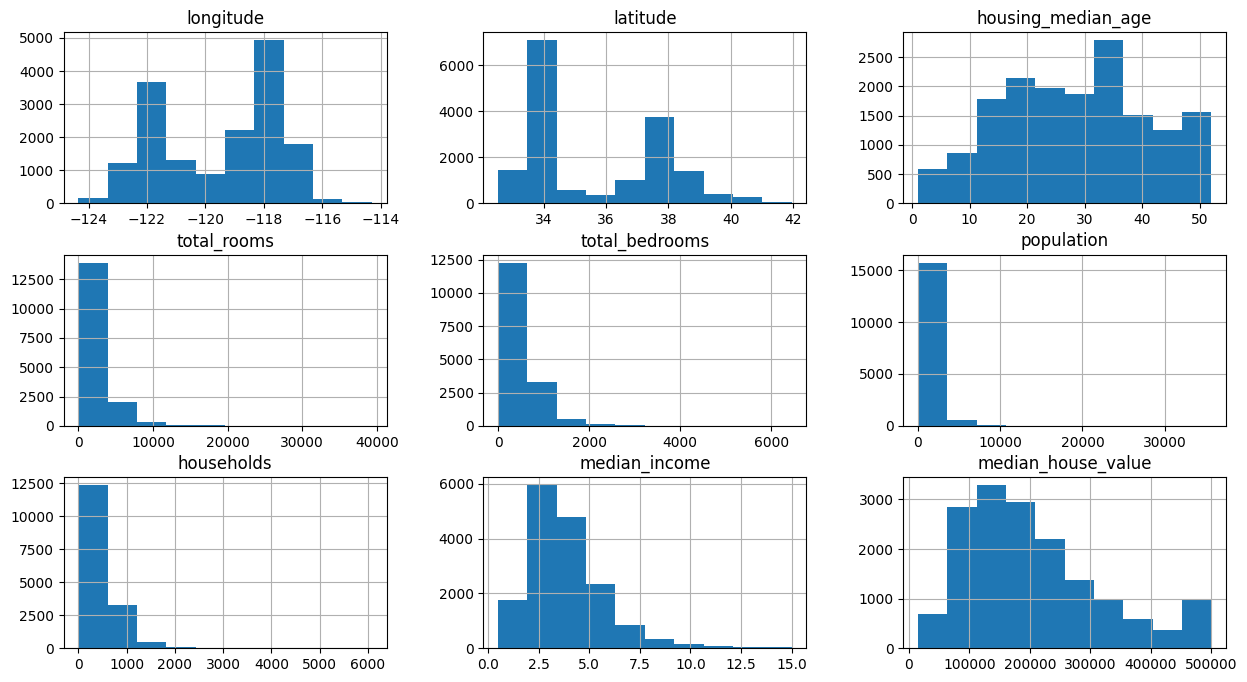

In [296]:
train_data.hist(figsize=(15,8))

In [297]:
# Note that 'households', 'total_bedrooms', 'population', and 'total_rooms' are heavily skewed categories

<Axes: >

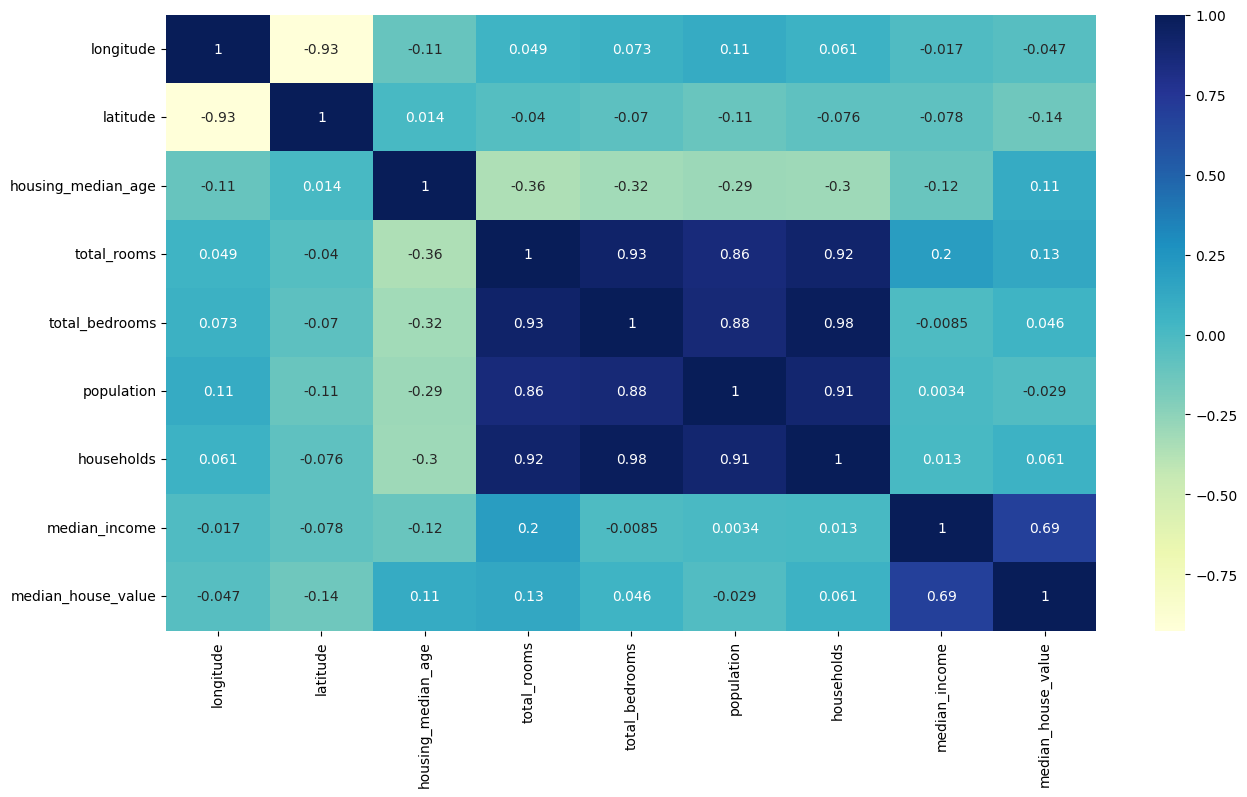

In [298]:
drop_ocean_prox = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(drop_ocean_prox.corr(), annot=True, cmap='YlGnBu')

In [299]:
# Note that Median income has a strong correlation with the prediction of the house value. A variable that has a strong influence on the value of the home/block of homes  

In [300]:
# Pre processing portion - adressing the skews in the aformentioned 4 categories 

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

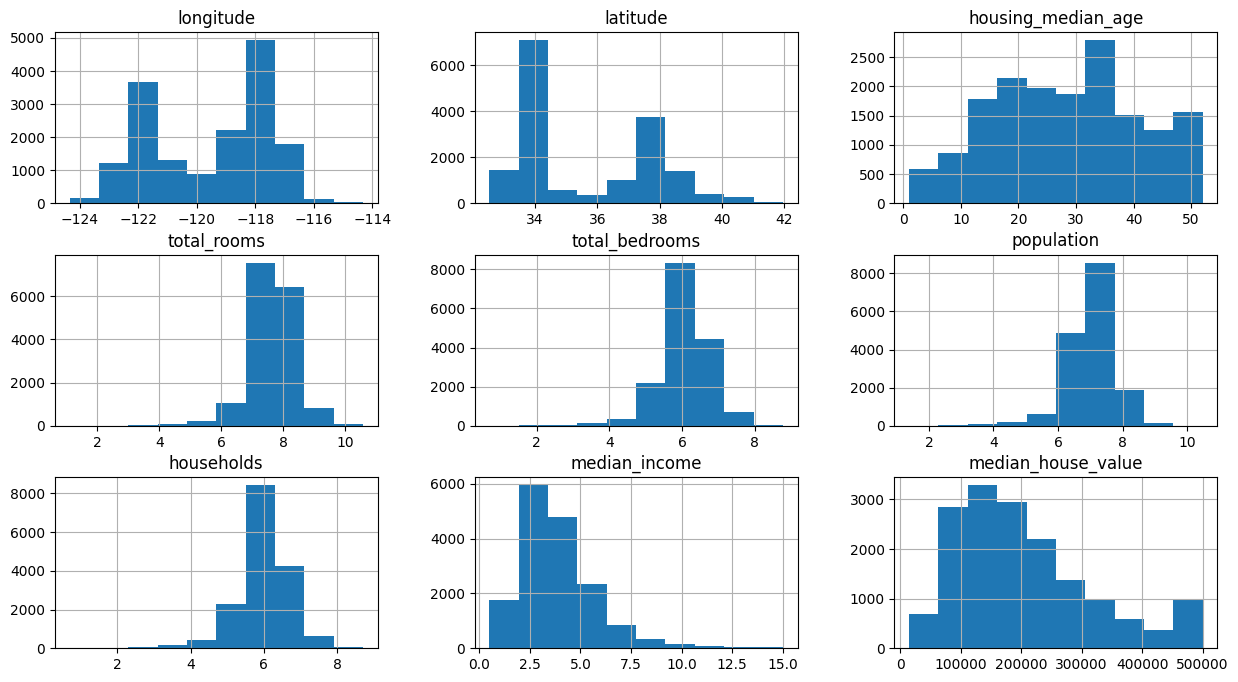

In [301]:
train_data.hist(figsize=(15,8))

In [302]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7191
INLAND        5188
NEAR OCEAN    2116
NEAR BAY      1846
ISLAND           5
Name: count, dtype: int64

In [303]:
dummy_df = pd.get_dummies(train_data['ocean_proximity'])
dummy_df = dummy_df.astype(int)

In [304]:
train_data = train_data.join(dummy_df).drop(['ocean_proximity'], axis=1)
train_data = train_data.drop(['ISLAND'], axis = 1)

In [305]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
15927,-122.42,37.73,46.0,7.506592,6.021023,7.336286,6.008813,4.0132,229400.0,0,0,1,0
12375,-116.38,33.74,7.0,9.774517,8.154788,8.183677,7.507141,4.0840,194500.0,0,1,0,0
17836,-121.86,37.41,16.0,7.788212,6.042633,7.421776,6.093570,6.5004,263600.0,1,0,0,0
18190,-122.01,37.37,11.0,7.847763,6.543912,7.177782,6.505784,4.1847,167300.0,1,0,0,0
5245,-118.43,34.09,27.0,7.386471,5.303305,6.210600,5.288267,7.9835,500001.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20056,-119.10,35.79,19.0,7.501082,6.169611,7.626570,6.033086,1.8144,49800.0,0,1,0,0
702,-122.02,37.63,6.0,7.802209,6.381816,7.081709,6.352629,3.8958,301100.0,0,0,1,0
975,-121.87,37.66,52.0,6.654153,4.905275,5.755742,4.820282,5.0677,233300.0,0,1,0,0
11455,-118.01,33.66,19.0,8.425078,6.952729,7.575585,6.814543,4.3550,429200.0,0,0,0,1


<Axes: >

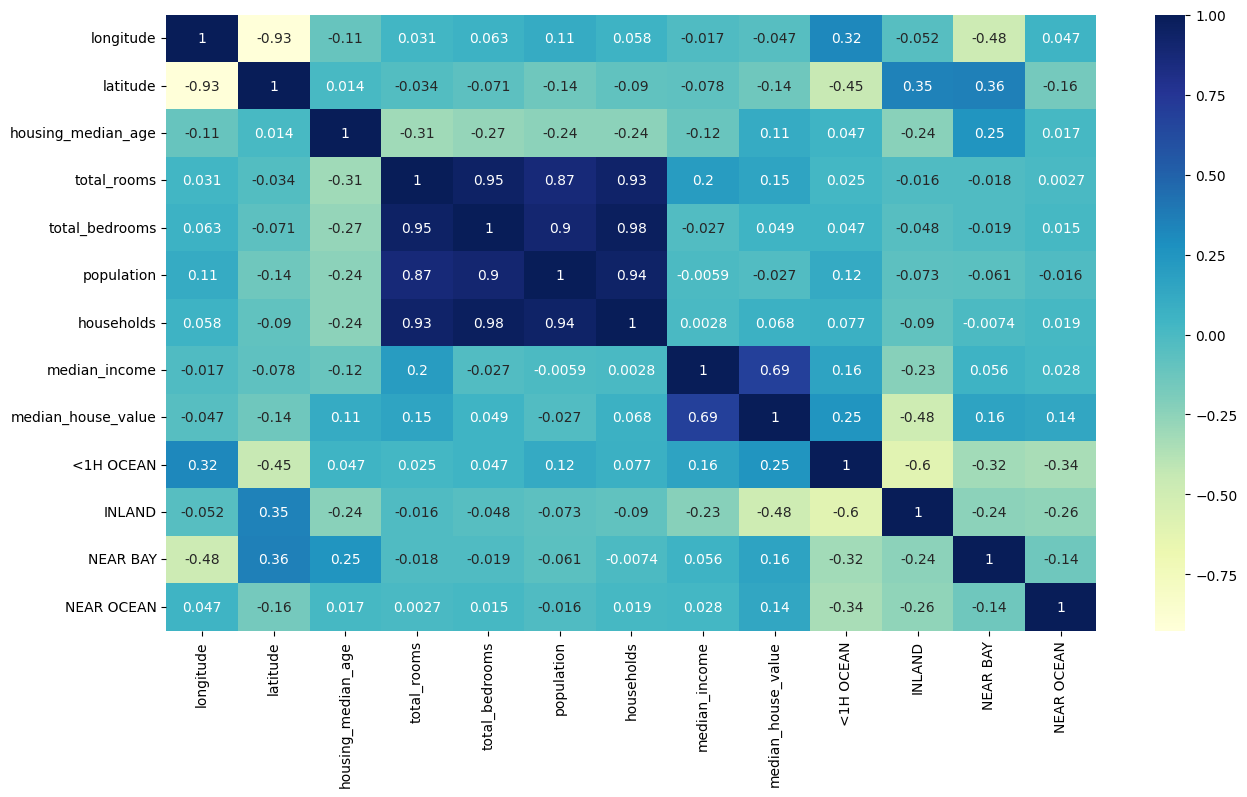

In [306]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

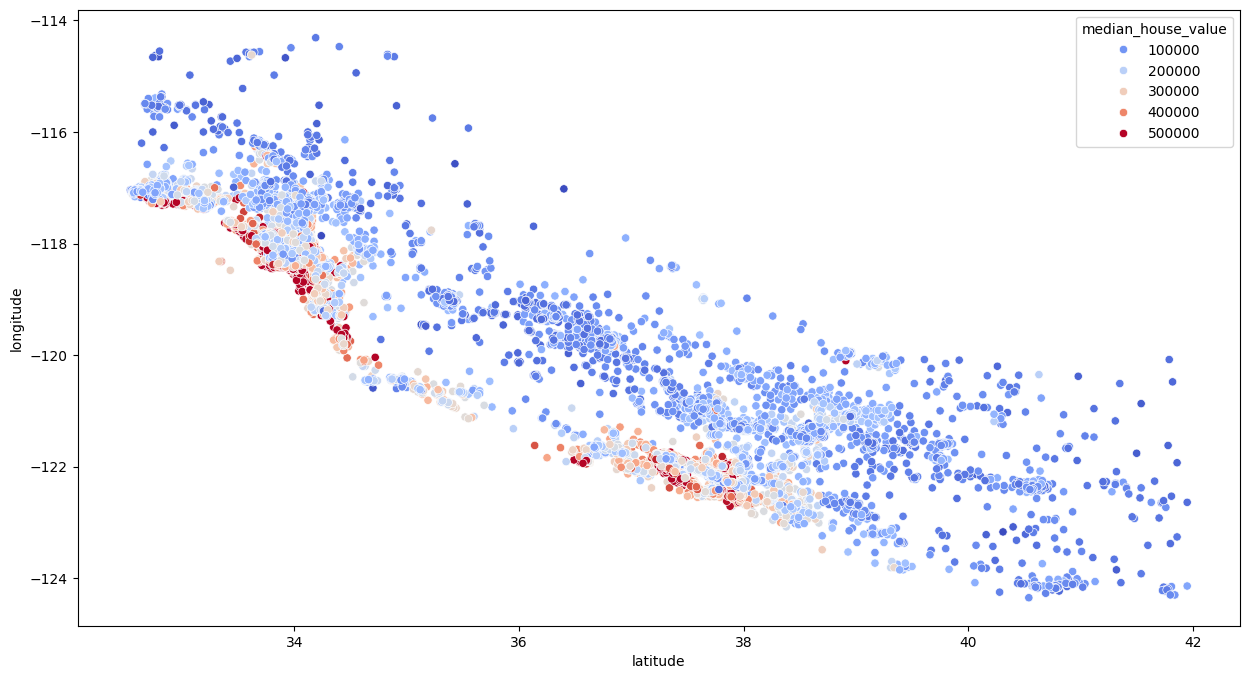

In [307]:
# See how the location and proximity actually influences the prices 
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y ='longitude', data = train_data, hue='median_house_value', palette='coolwarm')


In [308]:
# Althought the diagram above is not necessarily a map of California, it does display that the majoirty of the most expensive homes are along the coast. 

In [309]:
# Combine bedrooms and total rooms to explore how many of the total rooms are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# find out how many rooms per household 
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

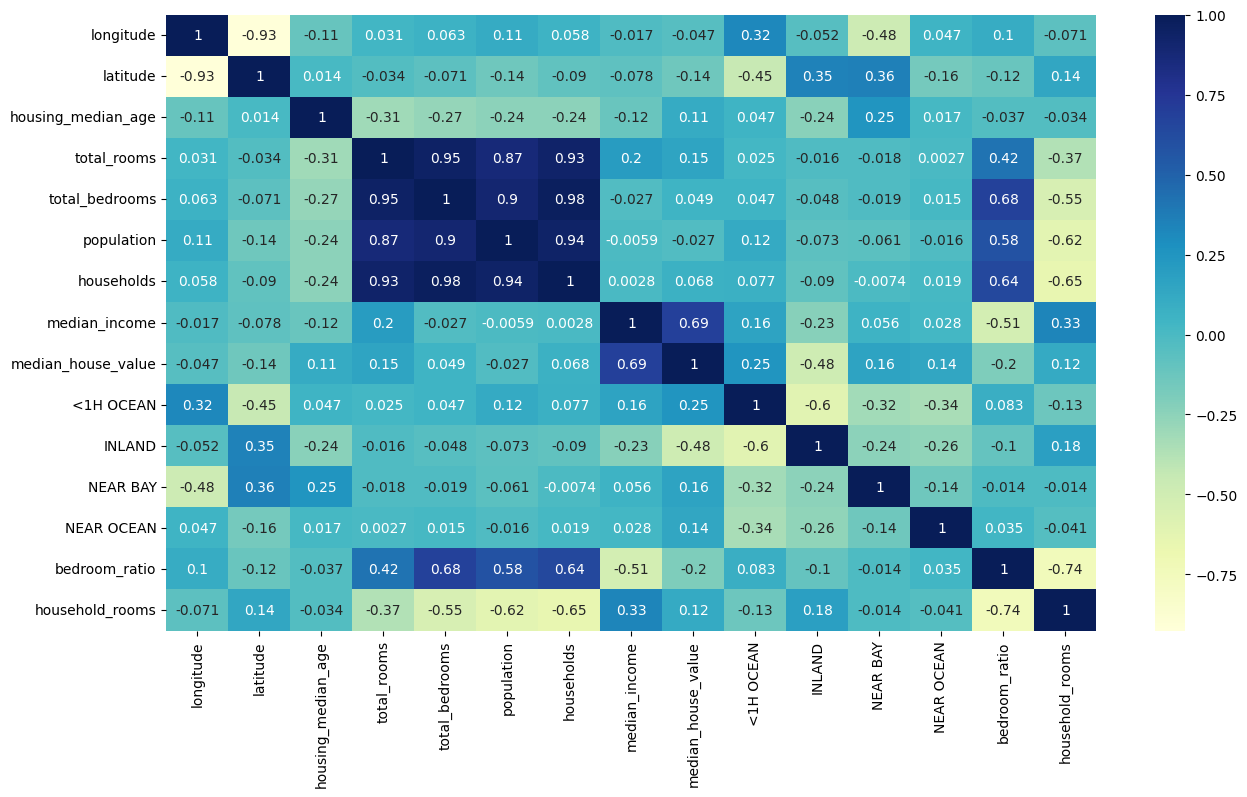

In [310]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)


LinearRegression()

In [312]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

dummy_df = pd.get_dummies(test_data['ocean_proximity'])
dummy_df = dummy_df.astype(int)
test_data = test_data.join(dummy_df).drop(['ocean_proximity'], axis=1)

# Combine bedrooms and total rooms to explore how many of the total rooms are bedrooms
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

# find out how many rooms per household 
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [313]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8485,-118.30,33.93,29.0,7.709308,5.983936,7.039660,5.866468,3.7969,169400.0,1,0,0,0,0.776196,1.314131
6794,-118.14,34.09,38.0,7.465083,6.126869,7.344719,6.133398,2.8500,219000.0,1,0,0,0,0.820737,1.217120
14038,-117.14,32.75,37.0,7.513709,6.265301,6.862758,6.192362,2.7852,129200.0,0,0,0,1,0.833849,1.213383
3167,-118.90,35.26,31.0,8.723557,7.308543,8.642415,7.284821,1.9066,54600.0,0,1,0,0,0.837794,1.197498
3836,-118.44,34.19,37.0,7.324490,5.843544,6.891626,5.852202,5.0000,243600.0,1,0,0,0,0.797809,1.251578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17315,-120.18,34.62,25.0,7.198931,5.393628,6.510258,5.420535,3.1912,226400.0,0,0,0,1,0.749226,1.328085
3415,-118.41,34.29,35.0,6.916715,5.323010,7.058758,5.375278,3.3500,147600.0,1,0,0,0,0.769586,1.286764
6591,-118.19,34.19,34.0,7.631432,5.564520,6.716595,5.541264,15.0001,500001.0,1,0,0,0,0.729158,1.377201
1891,-120.00,38.92,17.0,7.009409,5.337538,6.146329,5.198497,3.3295,126600.0,0,1,0,0,0.761482,1.348353


In [314]:
x_test_s = scaler.transform(x_test)

In [315]:
reg.score(x_test_s,y_test)

0.6603908100535478

In [318]:
# Import Random Forest Regression - This should give us a more accurate result 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [319]:
# Unscaled Score: 0.8204213965748763
# Scaled Score: 0.8183253659691243
forest.score(x_test_s, y_test)

0.8183253659691243

In [325]:
# Set hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid ={
    # 'n_estimators': [3, 10, 30], // Initial Parameter
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4,],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [326]:
best_forest = grid_search.best_estimator_

In [327]:
# First attempt score : 0.8174092057259525 
# Hyper pramameter tuned attempt: 0.8222120348463209
best_forest.score(x_test_s,y_test)

0.8222120348463209